# *DATA SCIENCE / SECTION 1 / PROJECT*



# 🏆 프로젝트 목표


> 다음 분기 설계할 게임 분석

#  🕹️ Data Description

*   `Name` : 게임 이름
*   `Platform` : 게임이 지원되는 플랫폼의 이름
*   `Year` : 게임 출시 연도 (1980-2020년)
*   `Genre` : 게임의 장르
*   `Publisher` : 게임을 제작한 회사
*   `NA_Sales` : 북미지역 출고량 (단위 :백만)
*   `EU_Sales` : 유럽지역에서의 출고량 (단위 :백만)
*   `JP_Sales` : 일본지역에서의 출고량 (단위 :백만)
*   `Other_Sales `: 기타지역 출고량 (단위 :백만)

#  데이터 탐색




## **1. Gathering Data**

In [1204]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


pd.set_option('mode.chained_assignment',  None) #warning sign 무시하기

!sudo apt-get install -y fonts-nanum  #한글폰트 다운
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1043]:
#데이터셋 불러오기
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## **2. 데이터 탐색 및 정제**

In [1044]:
#불필요한 행 제거
df = df.iloc[:,1:]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [1045]:
#결측치, 데이터타입 확인
#year, genre, publisher에 결측치 존재하고, 출고량과 year의 데이터타입 변경 필요.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [1046]:
#분석하기 쉽게 연도,이름순으로 정렬.
df.sort_values(by=['Year','Name'],ascending=True,inplace=True)

In [1047]:
#'Name'이 고유한지 확인하기 위해 이름의 중복치에 대해 이름과 연도를 기준으로 정렬
#같은 이름이어도 여러 플랫폼이 존재함.

df[df.duplicated(['Name'],keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
8144,ESPN NFL Primetime 2002,XB,2.0,Sports,Konami Digital Entertainment,0.01,0,0,0
11163,Momotarou Dentetsu 11,GC,2.0,Misc,Hudson Soft,0,0,0.07,0
15612,Rally Fusion: Race of Champions,PS2,2.0,Racing,Activision,0.06,0.05,0,0.02
8765,Disney's Aladdin,GBA,3.0,Platform,Capcom,0.02,0.01,0,0
...,...,...,...,...,...,...,...,...,...
6118,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0,0.12
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
15776,Without Warning,XB,NaN,Shooter,Capcom,0.01,0,0,0


In [1048]:
df[df.duplicated(['Name','Platform'],keep=False)]

# 같은 이름의 게임이어도 출시 년도가 다를 수 있음. (예를들면 재출시 하는 경우)
#그에 따라 'Year'은 대체가 불가능 하다고 판단됨.
#출고량에 단위가 'K'인것 발견

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
15705,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0,0.48,0,0
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [1049]:
# Year 결측치들 제거
df.dropna(subset=['Year'],inplace=True)

In [1050]:
#'Year'가 1900미만인 데이터 삭제.
df= df[df['Year'] > 1900]

In [1051]:
#데이터 수가 너무 적은 연도를 삭제해주자.
#1980년대는 처음 개발된 이후라 적은 것으로 간주하고 2017년 이후로의 게임은 데이터수가 너무 작아 삭제해준다.
df.groupby(['Year'])['Name'].count()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      20
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     120
1995.0     215
1996.0     260
1997.0     287
1998.0     376
1999.0     338
2000.0     346
2001.0     480
2002.0     826
2003.0     768
2004.0     759
2005.0     937
2006.0    1001
2007.0    1199
2008.0    1418
2009.0    1421
2010.0    1252
2011.0    1129
2012.0     655
2013.0     544
2014.0     580
2015.0     609
2016.0     339
2017.0       3
2020.0       1
Name: Name, dtype: int64

In [1052]:
df.drop(index = df.query('Year > 2016').index,inplace=True)

In [1053]:
#Genre의 결측치와 같은 게임이름의 데이터를 가진 다른 열이 있는지 확인
missing_G = df[df['Genre'].isnull()]
yes_G = df.copy()                       #원래 데이터를 복사해서 사용
yes_G = yes_G.dropna(subset=['Genre']) # 'Publisher'가 nan값인 행들만 제거!

have_G =[]
for data in yes_G['Name']:
    if data in missing_G['Name'].unique():
        have_G.append(data)

len(list(set(have_G)))  #20개의 데이터 대체 가능!

20

In [1054]:
missing_G['Genre']  = missing_G['Name'].map(lambda x : yes_G.query('Name == "'+x+'"').Genre.iloc[0] if len(yes_G.query('Name == "'+x+'"')) > 0 else np.NaN)

In [1055]:
missing_G.isnull().sum() #20개 대체완료.

Name            0
Platform        0
Year            0
Genre          30
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [1056]:
#df에 해당 데이터 덮어씌우기

df.update(missing_G,overwrite=True)

In [1057]:
#같은방법으로 'Publisher'확인 
missing_P = df[df['Publisher'].isnull()]
yes_P = df.copy()                       #원래 데이터를 복사해서 사용
yes_P = yes_P.dropna(subset=['Publisher']) # 'Publisher'가 nan값인 행들만 제거!

#기존데이터의 'Name'과 'Publisher'결측치의 'Name'이 같은 데이터가 있는지 확인.
have_P = []

for data in yes_P['Name']:           
    if data in missing_P['Name'].unique():
        have_P.append(data)
have_P                                #1개의 데이터 대체가능.

['Bound By Flame']

In [1058]:
missing_P['Publisher']  = missing_P['Name'].map(lambda x : yes_P.query('Name == "'+x+'"').Publisher.iloc[0] if len(yes_P.query('Name == "'+x+'"')) > 0 else np.NaN)

In [1059]:
df.update(missing_P,overwrite=True) #덮어쓰기

In [1060]:
df.isnull().sum() 

Name            0
Platform        0
Year            0
Genre          30
Publisher      35
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [1061]:
#결측치 삭제
df.dropna(inplace=True)

In [1062]:
#'Name','Platform','Year' 이 같은 항목 삭제
df.drop_duplicates(['Name','Platform','Year'],keep=False,inplace=True)

In [1063]:
df.reset_index(drop=True,inplace=True) #인덱스 재정렬.

In [1064]:
#출고량에 숫자이외의 문자가 들어있는 항목 전부 뽑아내기.
import re                

def has_errors(inputString):
  return bool(re.search('[a-zA-Z]+', inputString))

error_condition = df.NA_Sales.apply(has_errors)|df.EU_Sales.apply(has_errors)|df.JP_Sales.apply(has_errors)|df.Other_Sales.apply(has_errors)
error= df[error_condition]

In [1065]:
error

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0,0K
30,E.T.: The Extra Terrestrial,2600,1981.0,Action,Atari,1.84,110K,0,0.02
113,F1 Race,NES,1984.0,Racing,Nintendo,0,0,1.52,0K
129,Ice Climber,NES,1985.0,Platform,Nintendo,0.46M,0.1,0.92,0.02
146,Pro Yakyuu Family Stadium,NES,1986.0,Sports,Namco Bandai Games,0.15,0,2.05,0M
...,...,...,...,...,...,...,...,...,...
16056,Revolution: 25th Anniversary Collection,PC,2016.0,Adventure,Koch Media,0,0.02,0K,0
16075,Song of the Deep,PS4,2016.0,Action,Insomniac Games,0.05M,0,0,0.01
16108,The Idolmaster: Platinum Stars,PS4,2016.0,Simulation,Namco Bandai Games,0M,0,0.09,0
16121,Total War: WARHAMMER,PC,2016.0,Strategy,Sega,0M,0.1,0,0.01


In [1066]:
#출고량에 'K'나 'M'등 문자로 이루어진 데이터 변환해줌.
#'M'은 원래 단위와 같으니 지워주고
# 'K'인 데이터는 *0.001 을 해준다.

Sales= ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i in Sales:
  df[i] =df[i].replace({"K":"*0.001", "M":""}, regex=True).map(pd.eval)

In [1067]:
df[Sales]=round(df[Sales]*1000)

In [1068]:
df[Sales]= df[Sales].astype(int)

In [1069]:
#year 의 데이터 타입 정수로 바꿔주기.
df['Year']=df['Year'].astype(np.int64)

In [1070]:
#이상치확인

df[Sales].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16156.000000,16156.000000,16156.000000,16156.000000
mean,265.151027,147.348354,77.879426,48.216762
std,822.202940,508.311629,306.637311,189.856374
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,80.000000,20.000000,0.000000,10.000000
75%,240.000000,110.000000,40.000000,40.000000
max,41490.000000,29020.000000,10220.000000,10570.000000


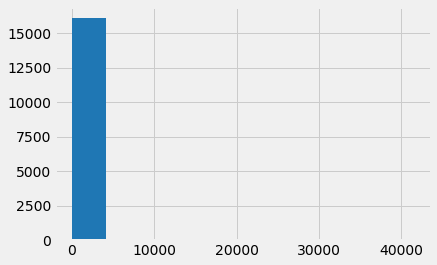

In [1071]:
#히스토그램을 그려서 이상치를 확인해보자
plt.hist(df['NA_Sales']);

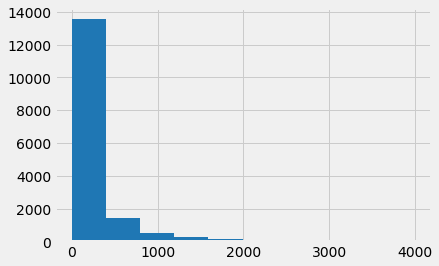

In [1072]:
plt.hist(df['NA_Sales'][df['NA_Sales']<4000]);

In [1073]:
len(df['NA_Sales'][df['NA_Sales']>=3000])/ len(df['NA_Sales'][df['NA_Sales']<3000])

0.008993255058705971

In [1074]:
#3000이상인 부분이 아닌부분에 비해 0.89퍼센트 밖에 되지않으므로 삭제해줌.
df.drop(index = df[df.NA_Sales>=3000].index,inplace=True)

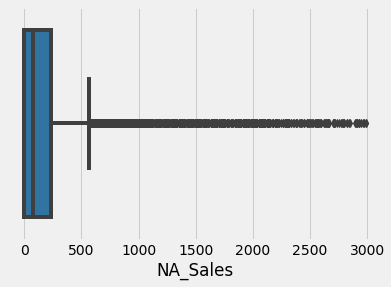

In [1075]:
# 박스플롯을 그려보자
sns.boxplot(x=df.NA_Sales);

In [1076]:
#500이상인 부분은 너무 많아서 지워주지 않는다.
len(df['NA_Sales'][df['NA_Sales']>=500]), len(df['NA_Sales'][df['NA_Sales']<500]) 

(1888, 14124)

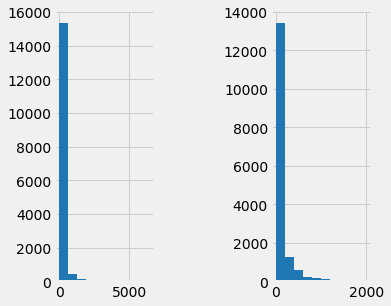

In [1077]:
#동일한 과정을 세번 더 반복한다.
#유럽판매량 이상치제거
fig = plt.figure(figsize=(10,6))

plt.subplot(131)
ax1 = plt.hist(df['EU_Sales']); #EU의 히스토그램

plt.subplot(132)
ax2 = plt.hist(df['EU_Sales'][df['EU_Sales']<2000]); #EU 판매량 2000미만
fig.tight_layout(pad=5.0) #plot 간 간격설정

In [1078]:
len(df['EU_Sales'][df['EU_Sales']>=2000])/ len(df['EU_Sales'][df['EU_Sales']<2000]) 

0.004327918208618203

In [1079]:
#2000이상의 데이터는 0.4프로에 해당하며 지워줘도 된다고 판단했다.
df.drop(index = df[df.EU_Sales>=2000].index,inplace=True)

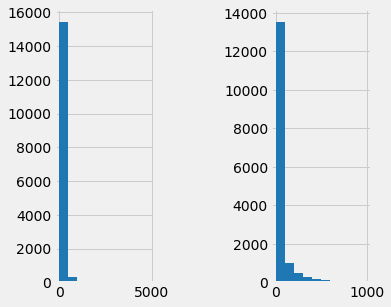

In [1080]:
#일본판매량 이상치 제거
fig = plt.figure(figsize=(10,6))

plt.subplot(131)
ax1 = plt.hist(df['JP_Sales']); #JP의 히스토그램

plt.subplot(132)
ax2 = plt.hist(df['JP_Sales'][df['JP_Sales']<1000]); #JP 판매량 1000미만

fig.tight_layout(pad=5.0) #plot 간 간격설정

In [1081]:
len(df['JP_Sales'][df['JP_Sales']>=1000])/ len(df['JP_Sales'][df['JP_Sales']<1000]) 

0.01097019657577679

In [1082]:
#1000이상의 데이터는 1프로에 해당하며 지워줘도 된다고 판단했다.
df.drop(index = df[df.JP_Sales>=1000].index,inplace=True)

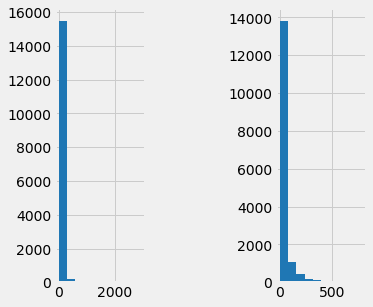

In [1083]:
#기타국가 판매량 이상치 제거
fig = plt.figure(figsize=(10,6))

plt.subplot(131)
ax1 = plt.hist(df['Other_Sales']); #Other 의 히스토그램

plt.subplot(132)
ax2 = plt.hist(df['Other_Sales'][df['Other_Sales']<800]); #Other 판매량 800미만

fig.tight_layout(pad=5.0) #plot 간 간격설정

In [1084]:
len(df['Other_Sales'][df['Other_Sales']>=800])/ len(df['Other_Sales'][df['Other_Sales']<800]) 

0.0016514227642276424

In [1085]:
#800이상의 데이터는 0.1프로에 해당하며 지워줘도 된다고 판단했다.
df.drop(index = df[df.Other_Sales>=800].index,inplace=True)

#Feature Engineering

## **1. 의미있는 Feature 추가**

In [1086]:
# 전 세계 통합 판매량을 알아보기 위해 Feature 를 추가한다.
df['Global_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

#지역별 선호 게임장르

## **1. 가설 설정 및 검정**

H0 : 지역이 달라도 선호하는 게임의 장르는 같다.

H1 : 적어도 한 지역은 선호하는 게임의 장르가 다르다.

In [1087]:
#라이브러리 불러오기
import scipy.stats as stats

In [1088]:
#가설검정에 앞서 지역별 게임판매량의 평균을 알아보자.

Sales_means = df.groupby('Genre',as_index=False)[Sales].mean()
Sales_means

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,218.382214,126.045412,37.013560,41.356039
1,Adventure,69.166667,42.793651,36.761905,11.714286
2,Fighting,233.452088,108.316953,75.859951,38.243243
3,Misc,181.658507,90.997552,40.195838,31.034272
4,Platform,288.014706,143.811275,56.985294,39.424020
5,Puzzle,141.084559,67.959559,58.400735,16.966912
6,Racing,230.521447,142.716569,20.866274,42.102607
7,Role-Playing,145.243991,70.706482,118.477786,25.367808
8,Shooter,290.595432,166.663948,21.272431,52.047308
9,Simulation,189.358354,98.861985,48.208232,29.927361


In [1089]:
NA_Sales = Sales_means['NA_Sales']
EU_Sales = Sales_means['EU_Sales']
JP_Sales = Sales_means['JP_Sales']
Other_Sales = Sales_means['Other_Sales']



F_statistic, pVal = stats.f_oneway(NA_Sales,EU_Sales,JP_Sales,Other_Sales)

print('분석 결과 : F={0:.1f}, p={1:}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 귀무가설이 기각, 적어도 한지역은 선호하는 게임이 통계적으로 유의미하게 다릅니다.')

분석 결과 : F=34.3, p=1.3965177957747562e-11
P-value 값이 충분히 작음으로 인해 귀무가설이 기각, 적어도 한지역은 선호하는 게임이 통계적으로 유의미하게 다릅니다.


## **2. 사후 분석 및 시각화**

In [1090]:
#그래프를 선호도순으로 나열하기 위해 내림차순으로 정렬한다.
NA_Sales = Sales_means.sort_values(by='NA_Sales',ascending = False)
EU_Sales = Sales_means.sort_values(by='EU_Sales',ascending = False)
JP_Sales = Sales_means.sort_values(by='JP_Sales',ascending = False)
Other_Sales = Sales_means.sort_values(by='Other_Sales',ascending = False)


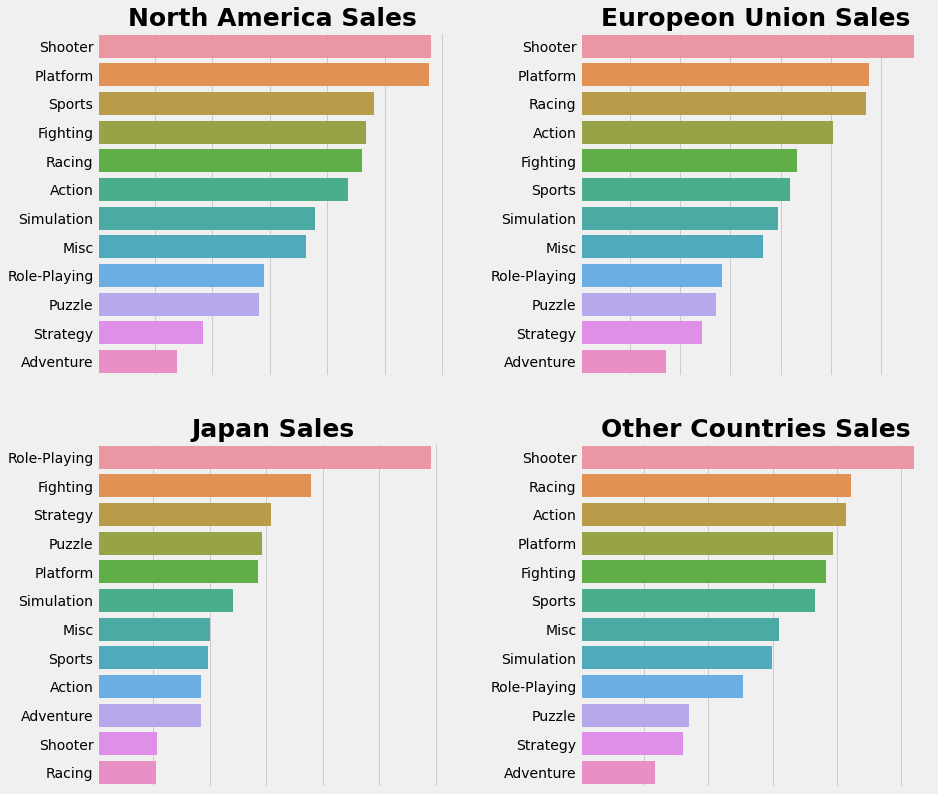

In [1091]:
# 그렇다면 각 지역별로 장르선호도가 어떻게 다를까

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(14,12))
plt.subplot(221)
ax1 = sns.barplot(x=NA_Sales['NA_Sales'], y= NA_Sales['Genre'])
ax = plt.gca()
plt.title('North America Sales',fontsize=25, fontweight='semibold')
ax1.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(222)
ax2 = sns.barplot(x=EU_Sales['EU_Sales'], y= EU_Sales['Genre'])
plt.title('Europeon Union Sales',fontsize=25, fontweight='semibold')
ax2.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(223)
ax3 = sns.barplot(x=JP_Sales['JP_Sales'], y= JP_Sales['Genre'])
plt.title('Japan Sales',fontsize=25, fontweight='semibold')
ax3.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(224)
ax4 = sns.barplot(x=Other_Sales['Other_Sales'], y= Other_Sales['Genre'])
plt.title('Other Countries Sales',fontsize=25, fontweight='semibold')
ax4.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

fig.tight_layout(pad=3.0) #plot 간 간격설정
plt.show;

미국과 유럽, 기타국가들은 슈팅게임를 제일 선호하는 것으로 보이나 일본의 경우는 슈팅게임을 선호하지 않는다. 

다른나라들은 모두 비슷한 장르를 선호하는 것으로 보이나 일본의 경우는 다른 양상을 띈다. 

#연도별 게임 트랜드


## **1.연도별 게임출고 현황**


*   제일 먼저 연도별 게임의 판매현황을 살펴 본 다음, 연도별 선호 장르추이가 어떻게 변하는지 살펴보자



In [1117]:
# 연도별 게임 판매현황
sales_by_year =df.groupby('Year',as_index=False)[['Global_Sales']].sum()
sales_by_year

,Year,Global_Sales
0,1980,7070
1,1981,31180
2,1982,21070
3,1983,9180
4,1984,6120
5,1985,7200
6,1986,11260
7,1987,7540
8,1988,10590
9,1989,12060


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

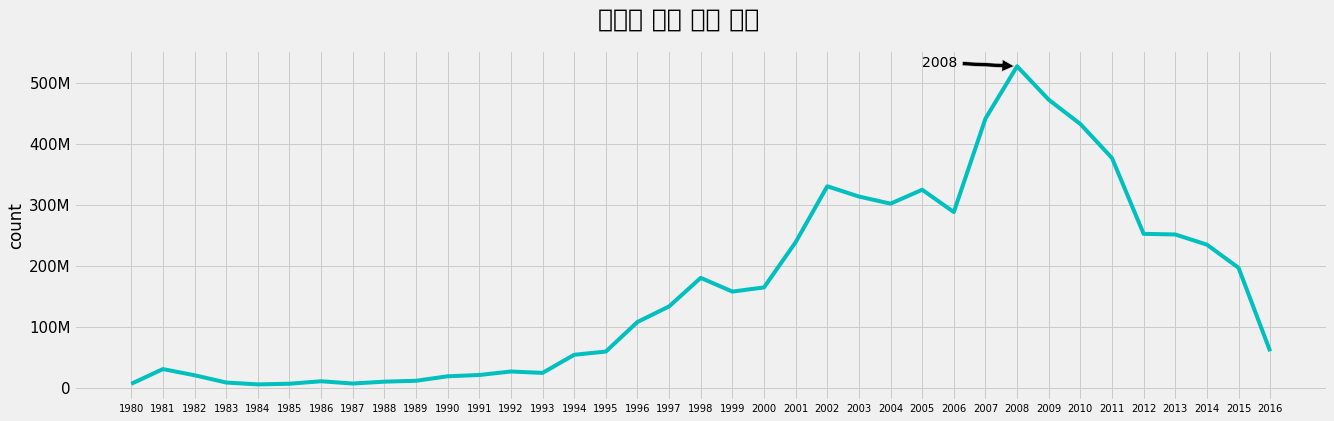

In [1124]:
# 연도별 게임 판매현황 시각화

from matplotlib import rc

plt.rc('font', family='NanumBarunGothic') 

fig = plt.figure(figsize=(20,6))
ax = sns.lineplot(x=sales_by_year.Year ,y=sales_by_year.Global_Sales, color='c')
ax.set(xlabel=None , ylabel='count')
plt.suptitle('연도별 게임 판매 현황',fontsize=25, fontweight='semibold')
ax.annotate("2008", xy=(2008, 526760), xytext=(2005, 525000),arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xticks(range(1980,2017))
ax.set_xticklabels(range(1980,2017), fontsize=10)
ax.set_yticks([ 0,100000, 200000,300000, 400000,500000])
ax.set_yticklabels(labels=['0','100M','200M','300M','400M','500M'], fontsize=15)
plt.show;



*  2005년~2010년 사이 가장 많은 게임이 판매되었다. 그렇다면 연도별 게임트랜드는 어떻게 변했을까?




In [1155]:
#장르별 평균 판매량을 연도순으로 정렬
s_y = df.groupby(['Genre','Year'],as_index=False)['Global_Sales'].sum()

In [1156]:
s_y 

,Genre,Year,Global_Sales
0,Action,1980,340
1,Action,1981,14790
2,Action,1982,6500
3,Action,1983,2860
4,Action,1984,1850
...,...,...,...
369,Strategy,2012,3330
370,Strategy,2013,6320
371,Strategy,2014,970
372,Strategy,2015,1820



## **2.장르별 전체 출고량 변화**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

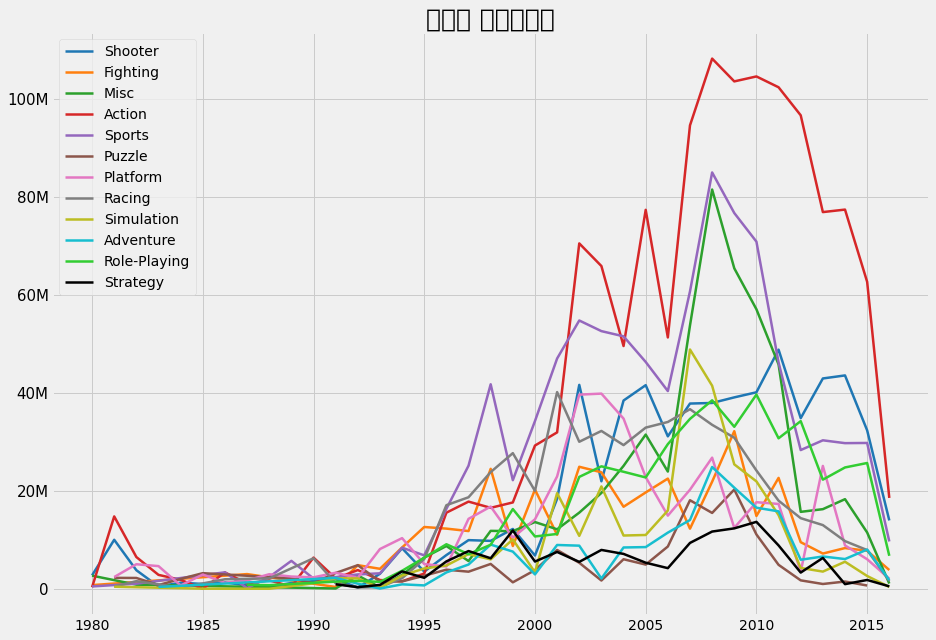

In [1157]:

#장르별 전체 출고량은 어떻게 변했는지 알아보자.
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(14,10))
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

ax1= sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Shooter'").Global_Sales,linewidth=2.5,label='Shooter',color='#1f77b4')
ax2 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Fighting'").Global_Sales,linewidth=2.5,label='Fighting',color='#ff7f0e')
ax3 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Misc'").Global_Sales,linewidth=2.5,label='Misc',color='#2ca02c')
ax4 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Action'").Global_Sales,linewidth=2.5,label='Action',color='#d62728')
ax5 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Sports'").Global_Sales,linewidth=2.5,label='Sports',color='#9467bd')
ax6 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Puzzle'").Global_Sales,linewidth=2.5,label='Puzzle',color='#8c564b')
ax7 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Platform'").Global_Sales,linewidth=2.5,label='Platform',color='#e377c2')
ax8 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Racing'").Global_Sales,linewidth=2.5,label='Racing',color='#7f7f7f')
ax9 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Simulation'").Global_Sales,linewidth=2.5,label='Simulation',color='#bcbd22')
ax10 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Adventure'").Global_Sales,linewidth=2.5,label='Adventure',color='#17becf')
ax11 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Role-Playing'").Global_Sales,linewidth=2.5,label='Role-Playing',color='limegreen')
ax12 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Strategy'").Global_Sales,linewidth=2.5,label='Strategy',color='k')
ax.set_yticks([ 0,20000, 40000,60000, 80000,100000])
ax.set_yticklabels(labels=['0','20M','40M','60M','80M','100M'], fontsize=15)
plt.title('장르별 판매량변화',fontsize=25, fontweight='semibold')

ax.set(xlabel=None , ylabel=None)
plt.legend();



*   1995년 이후로 전체적인 판매량이 높아졌다가 2010년 이후로 줄어들었고 점점 줄어든다.
*   2000년 이후로 액션정르가 정말 큰 사랑을 받았다.



##**3.연도별 가장 많이 팔린 게임 장르**

In [1153]:

#역대 어떤 장르가 가장 많이 팔렸을까?

s_g = df.groupby('Genre',as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales',ascending=False).reset_index(drop=True)
s_g

,Genre,Global_Sales
0,Action,1340690
1,Sports,939450
2,Shooter,650490
3,Misc,561910
4,Racing,518650
5,Role-Playing,494000
6,Platform,431040
7,Fighting,371080
8,Simulation,302610
9,Adventure,202150


In [1159]:
s_y_g= df.groupby(['Year','Genre'],as_index=False)['Global_Sales'].sum().sort_values(by='Year',ascending=True) #각 연도마다 장르별 총판매량을 정렬.

In [1161]:
#연도별로 가장 많은 총판매량을 가진 게임의 장르는?
#연도별 게임트랜드

top_genre = s_y_g.loc[s_y_g.groupby(['Year'])['Global_Sales'].idxmax()].reset_index(drop=True)
top_genre.iloc[:,0:2]

,Year,Genre
0,1980,Shooter
1,1981,Action
2,1982,Action
3,1983,Platform
4,1984,Puzzle
5,1985,Puzzle
6,1986,Sports
7,1987,Fighting
8,1988,Platform
9,1989,Sports





*   과거에는 연도에 따라 선호하는 장르가 자주 바뀌었다.
*   2002년 이후로 Action이 정말 강세를 보이며 선호하는 장르에 변화가 없다.


# 출고량이 높은 게임

## **1.역대 게임순위**

In [1174]:
#역대 총 출고량이 가장 많은 게임 top10
s_n = df.groupby(['Name','Genre','Year'],as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales',ascending=False).reset_index(drop=True)
s_n.head(10)

,Name,Genre,Year,Global_Sales
0,Battlefield 4,Shooter,2013,14040
1,Assassin's Creed IV: Black Flag,Action,2013,13200
2,Star Wars: The Force Unleashed,Action,2008,10210
3,Guitar Hero: World Tour,Misc,2008,10050
4,LEGO Star Wars: The Complete Saga,Action,2007,9910
5,LEGO Marvel Super Heroes,Action,2013,9860
6,LEGO Indiana Jones: The Original Adventures,Action,2008,9690
7,Watch Dogs,Action,2014,9500
8,LEGO Batman: The Videogame,Action,2008,9180
9,Call of Duty: Advanced Warfare,Shooter,2014,9150


In [1173]:
#최근 5년 가장 많이 팔린 게임 top10
recent_5y = df.query("2011<Year<2017").groupby(['Name','Genre','Year'],as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales',ascending=False).reset_index(drop=True)
recent_5y.head(10)

,Name,Genre,Year,Global_Sales
0,Battlefield 4,Shooter,2013,14040
1,Assassin's Creed IV: Black Flag,Action,2013,13200
2,LEGO Marvel Super Heroes,Action,2013,9860
3,Watch Dogs,Action,2014,9500
4,Call of Duty: Advanced Warfare,Shooter,2014,9150
5,Minecraft,Misc,2014,8690
6,NBA 2K16,Sports,2015,8010
7,Assassin's Creed: Unity,Action,2014,7920
8,Call of Duty: Ghosts,Shooter,2013,7580
9,Far Cry 3,Shooter,2012,7450


# 분석을 통한 목표설정

## **1.RFM**






*  `recency`: 얼마나 최근에 출시됐는가

*   `ferequency`: 얼마나 자주 출시 됐는가 (장르에대해)
*   `monetary`: 얼마나 많은 판매되었는가


를 분석하여 우리가 어떤 게임을 장르를 개발하면 좋을지 판단해 봅시다.

In [1195]:
rfm_r = df.groupby(['Genre'],as_index=False)['Year'].mean()

In [1196]:
rfm_r

,Genre,Year
0,Action,2007.964995
1,Adventure,2008.188889
2,Fighting,2004.767813
3,Misc,2007.362301
4,Platform,2004.223039
5,Puzzle,2005.446691
6,Racing,2004.904962
7,Role-Playing,2007.324836
8,Shooter,2005.884992
9,Simulation,2006.576271


In [1197]:
rfm_f = df.groupby(['Genre'],as_index=False)['Name'].count()
rfm_f

,Genre,Name
0,Action,3171
1,Adventure,1260
2,Fighting,814
3,Misc,1634
4,Platform,816
5,Puzzle,544
6,Racing,1189
7,Role-Playing,1373
8,Shooter,1226
9,Simulation,826


In [1198]:
rfm_m = s_g
rfm_m

,Genre,Global_Sales
0,Action,1340690
1,Sports,939450
2,Shooter,650490
3,Misc,561910
4,Racing,518650
5,Role-Playing,494000
6,Platform,431040
7,Fighting,371080
8,Simulation,302610
9,Adventure,202150


In [1199]:
rfm_r = rfm_r.set_index('Genre')
rfm_f = rfm_f.set_index('Genre')
rfm_m = rfm_m.set_index('Genre')
rfm = rfm_r.join([rfm_f, rfm_m], how='inner')
col_names = ['Recency','Frequency','Monetary']
rfm.columns = col_names
rfm

,Recency,Frequency,Monetary
Genre,,,
Action,2007.964995,3171,1340690
Adventure,2008.188889,1260,202150
Fighting,2004.767813,814,371080
Misc,2007.362301,1634,561910
Platform,2004.223039,816,431040
Puzzle,2005.446691,544,154720
Racing,2004.904962,1189,518650
Role-Playing,2007.324836,1373,494000
Shooter,2005.884992,1226,650490


## **2.clustering**

In [1206]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled

array([[ 1.4451436 ,  2.58884859,  2.5096016 ],
       [ 1.62390695, -0.07241535, -0.92951582],
       [-1.10758206, -0.69351619, -0.41923941],
       [ 0.96393456,  0.4484181 ,  0.15718898],
       [-1.54254594, -0.69073098, -0.23812194],
       [-0.56554565, -1.06951894, -1.07278469],
       [-0.99807829, -0.17129014,  0.02651617],
       [ 0.9340214 ,  0.08494877, -0.04794256],
       [-0.2155933 , -0.11976384,  0.42475711],
       [ 0.33634479, -0.67680496, -0.62606251],
       [-0.50475493,  1.28397977,  1.29760073],
       [-0.36925112, -0.91215483, -1.08199764]])

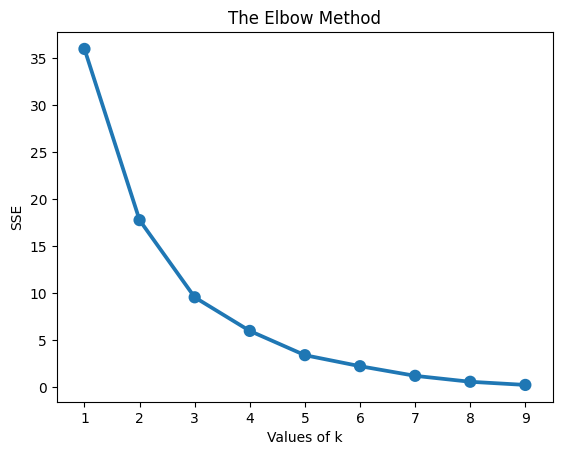

In [1209]:
#장르를 몇개의 cluster로  나눌 것인가? #그래프로 보았을때 3개가 적당해보인다.
sse = {} 

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1) 
  kmeans.fit(rfm_scaled) #kmeans를 학습시킨다!
  sse[k] = kmeans.inertia_
plt.style.use('default')
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [1210]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(rfm_scaled)

# 장르별 클러스터 지정
cluster_labels = kmeans.labels_

rfm_k3 = rfm.assign(Cluster = cluster_labels)

In [1211]:
rfm_k3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean','count']
}).round(0)

Recency Frequency   Monetary      
           mean      mean       mean count
Cluster                                   
0        2007.0    2702.0  1140070.0     2
1        2007.0    1273.0   390168.0     4
2        2005.0     874.0   379608.0     6

In [1222]:
#각 클러스터를 새로운 column에 지정하여 넣어준다.
cluster_0 = rfm_k3[rfm_k3.Cluster == 0]
cluster_1 = rfm_k3[rfm_k3.Cluster == 1]
cluster_2 = rfm_k3[rfm_k3.Cluster == 2]

In [1221]:
rfm_k3

,Recency,Frequency,Monetary,Cluster
Genre,,,,
Action,2007.964995,3171,1340690,0
Adventure,2008.188889,1260,202150,1
Fighting,2004.767813,814,371080,2
Misc,2007.362301,1634,561910,1
Platform,2004.223039,816,431040,2
Puzzle,2005.446691,544,154720,2
Racing,2004.904962,1189,518650,2
Role-Playing,2007.324836,1373,494000,1
Shooter,2005.884992,1226,650490,2


In [1226]:
#각 클러스터가 전체 데이터에서 차지하는 중요도를 구해보자.
cluster_avg = rfm_k3.groupby(['Cluster']).mean()
population_avg = rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Recency,Frequency,Monetary
Cluster,,,
0,0.000294,1.059832,1.235994
1,0.000602,-0.029535,-0.234773
2,-0.000499,-0.333587,-0.255483


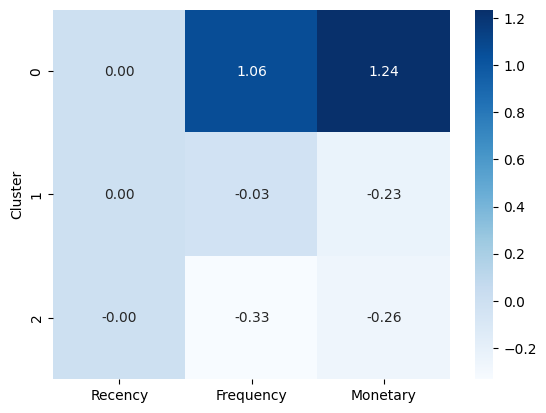

In [1229]:
#중요도를 시각화.
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap = 'Blues');

In [1231]:

rfm_k3.query('Cluster==0')

,Recency,Frequency,Monetary,Cluster
Genre,,,,
Action,2007.964995,3171,1340690,0
Sports,2005.522829,2234,939450,0


**분석결과 우리는 Action 과 Sports 게임에 집중하여 개발하여야한다는 결론을 내렸다.**

